In [127]:
pip install sewar

Note: you may need to restart the kernel to use updated packages.


In [128]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [129]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
from sewar.full_ref import mse
from sklearn.metrics import mean_squared_error as mse



s 29.575
Size(dimension):  (387, 581)


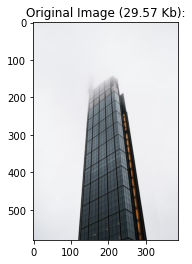

In [130]:
path = 'build.jpeg'
image = Image.open(path)
s = float(os.path.getsize(path))/1000
print("s",s)
print("Size(dimension): ",image.size)
plt.title("Original Image (%0.2f Kb):" %s)
plt.imshow(image)

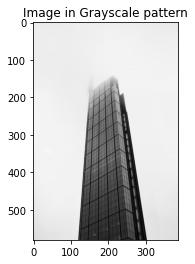

In [131]:
imggray = image.convert('LA')
imgmat = np.array( list(imggray.getdata(band = 0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure()
plt.imshow(imgmat, cmap = 'gray')
plt.title("Image in Grayscale pattern")
plt.show()

After compression: 


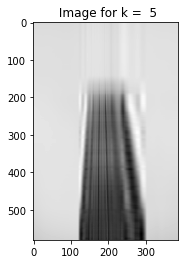

The compression ratio is:  46.408049535603716
peak signal to noise ratio 33.99269504589459
Mean square error is:  48.227852717625765


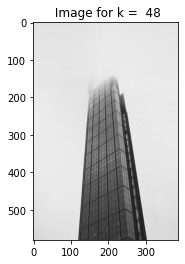

The compression ratio is:  4.834171826625387
peak signal to noise ratio 17.88543971751947
Mean square error is:  112.44120668721398


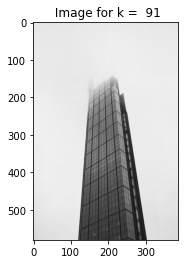

The compression ratio is:  2.5498928316265776
peak signal to noise ratio 24.688600927361236
Mean square error is:  67.50020680729563


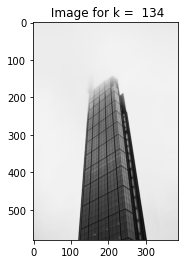

The compression ratio is:  1.7316436393881984
peak signal to noise ratio 27.16036532784043
Mean square error is:  55.768807233363134


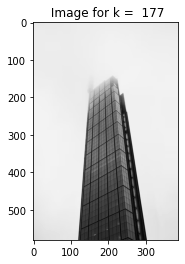

The compression ratio is:  1.3109618512882406
peak signal to noise ratio 31.190612994208365
Mean square error is:  49.701112311927666


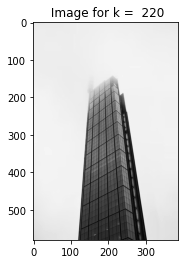

The compression ratio is:  1.0547283985364482
peak signal to noise ratio 33.87801629333047
Mean square error is:  48.504752120330714


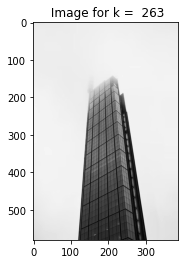

The compression ratio is:  0.8822823105628083
peak signal to noise ratio 33.989353062014736
Mean square error is:  48.193238068553285


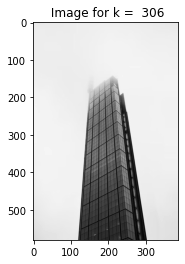

The compression ratio is:  0.7583014630000607
peak signal to noise ratio 33.99143662919823
Mean square error is:  48.20030064888569


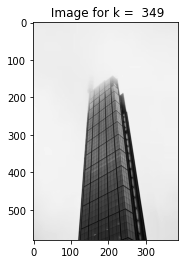

The compression ratio is:  0.6648717698510561
peak signal to noise ratio 33.98987783022036
Mean square error is:  48.31704225540034


In [134]:
cr = []
k = []
p_s_n_r = []
mse = []
print("After compression: ")
U, S, Vt = np.linalg.svd(imgmat) #single value decomposition
for i in range(5, 388 ,43 ):
    cmpimg = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(Vt[:i,:]) #SVD
    plt.imshow(cmpimg, cmap = 'gray')
    title = " Image for k =  %s" %i
    plt.title(title)
    plt.show()
    result = Image.fromarray((cmpimg ).astype(np.uint8))
    k.append(i)
    
    # Finding the compression ratio
    from PIL import Image
    im = Image.open('build.jpeg')
    width, height = im.size
    CompressionRatio = width*height / (i*(width+height+1))
    print("The compression ratio is: ",CompressionRatio)
    cr.append(CompressionRatio)
   
    # peak signal to noise ratio
    import cv2
    img1 = cv2.imread('build.jpeg')
    img2 = cv2.imread('compressed.jpg')
    psnr = cv2.PSNR(img1, img2)
    print("peak signal to noise ratio",psnr)
    p_s_n_r.append(psnr)
    result.save('compressed.jpg')
    
    #mean Square error
    def MSE(img1, img2):
        squared_diff = (img1 -img2) ** 2
        summed = np.sum(squared_diff)
        num_pix = img1.shape[0] * img1.shape[1]  #img1 and 2 should have same shape
        err = summed / num_pix
        return err
    M = MSE(img1,img2)
    print("Mean square error is: ",MSE(img1,img2))
    mse.append(M)


<h4> k_values

In [113]:
k

[5, 48, 91, 134, 177, 220, 263, 306, 349]

<h4> compression ratio

cr

In [115]:
p_s_n_r

[33.99292397840493,
 17.88543971751947,
 24.688600927361236,
 27.16036532784043,
 31.190612994208365,
 33.87801629333047,
 33.989353062014736,
 33.99143662919823,
 33.98987783022036]

<h4> mean square error

In [116]:
mse

[48.1964269036278,
 112.44120668721398,
 67.50020680729563,
 55.768807233363134,
 49.701112311927666,
 48.504752120330714,
 48.193238068553285,
 48.20030064888569,
 48.31704225540034]

<h4> k_value vs compression_ratio

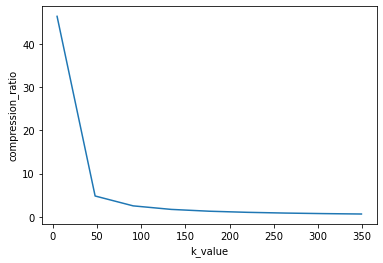

In [117]:
plt.xlabel("k_value")
plt.ylabel("compression_ratio")
plt.plot(k,cr)

<h4> For increase in k values the compression ratio decreases

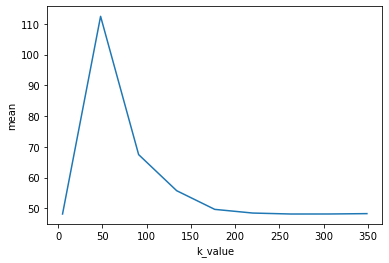

In [118]:
plt.xlabel("k_value")
plt.ylabel("mean")
plt.plot(k,mse)

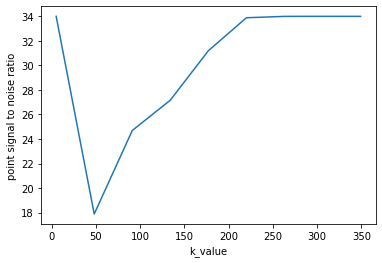

In [121]:
plt.xlabel("k_value")
plt.ylabel("point signal to noise ratio")
plt.plot(k,p_s_n_r)